In [ ]:
# species name

names = ['iSbBS512_1146', 'iSDY_1059', 'iSF_1195', 'iYL1228', 'iZ_1308', 'STM_v1_0']
name = names[4]

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 54.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re

def simplify_fasta(input_file, output_file):

    with open(input_file, 'r') as infile:
        lines = infile.readlines()

    updated_lines = []
    sequence = ""
    gene_name = ""

    gene_pattern = re.compile(r"\[locus_tag=([^\]]+)\]")

    for line in lines:
        line = line.strip()
        if line.startswith(">"):

            if sequence:
                updated_lines.append(f">{gene_name}\n{sequence}\n")
                sequence = ""

            match = gene_pattern.search(line)
            if match:
                gene_name = match.group(1)
        else:

            sequence += line

    if sequence:
        updated_lines.append(f">{gene_name}\n{sequence}\n")

    with open(output_file, 'w') as outfile:
        outfile.writelines(updated_lines)

input_file = f'/content/drive/MyDrive/Deepknock/test_data_{name}/{name}.fasta'
output_file = f'/content/drive/MyDrive/Deepknock/test_data_{name}/{name}.tag_seq.fasta'

simplify_fasta(input_file, output_file)

In [ ]:
from Bio import SeqIO

# read fasta
def read_fasta(file_path):
    gene_sequence_dict = {}

    # Extract fasta by SeqIO
    for record in SeqIO.parse(file_path, "fasta"):
        gene_name = record.id
        sequence = str(record.seq)
        gene_sequence_dict[gene_name] = sequence

    return gene_sequence_dict

# read fasta and write dic
file_path = f"/content/drive/MyDrive/Deepknock/test_data_{name}/{name}.tag_seq.fasta"
gene_sequence_dict = read_fasta(file_path)

# print top items
for gene, sequence in list(gene_sequence_dict.items())[:5]:
    print(f"Gene: {gene}, Sequence: {sequence[:30]}...")

Gene: Z0001, Sequence: MKRISTTITTTITTTITITITTGNGAG...
Gene: Z0002, Sequence: MRVLKFGGTSVANAERFLRVADILESNARQ...
Gene: Z0003, Sequence: MVKVYAPASSANMSVGFDVLGAAVTPVDGA...
Gene: Z0004, Sequence: MKLYNLKDHNEQVSFAQAVTQGLGKNQGLF...
Gene: Z0005, Sequence: MKKMQSIVLALSLVLVAPMATQAAEITLVP...


In [ ]:
# gene number
num_genes = len(gene_sequence_dict)
print(f"Total number of genes: {num_genes}")

Total number of genes: 5349


In [ ]:
all_genes = set(list(gene_sequence_dict.keys()))

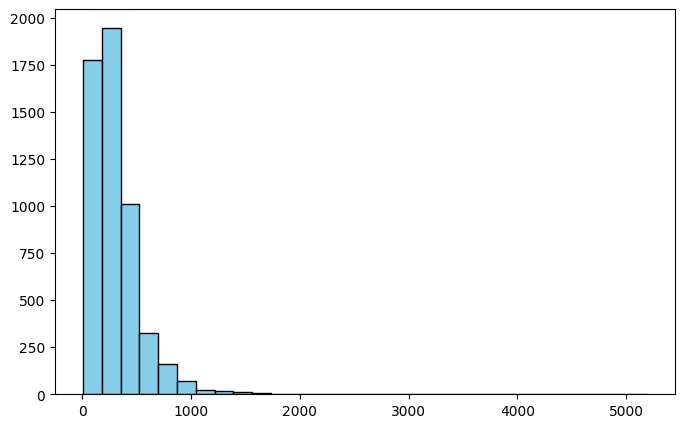

In [ ]:
import matplotlib.pyplot as plt

# gene legth
gene_lengths = [len(sequence) for sequence in gene_sequence_dict.values()]

# plot the distribution of gene length
plt.figure(figsize=(8, 5))
plt.hist(gene_lengths, bins=30, color='skyblue', edgecolor='black')
#plt.title('Gene Length Distribution')
#plt.xlabel('Gene Length')
#plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('iSbBS512_1146_4246', dpi=600)
plt.show()

In [ ]:
# define standard amino acids
standard_amino_acids = set('ACDEFGHIKLMNPQRSTVWY')

# check non-standard aa
def check_non_standard_amino_acids(sequence):
    return any(aa not in standard_amino_acids for aa in sequence)

# print genes that have non-standard aas
non_standard_count = 0
for gene, sequence in gene_sequence_dict.items():
    if check_non_standard_amino_acids(sequence):
        non_standard_count += 1
        print(gene, sequence)
        print('--------')

print(f"Number of genes containing non-standard amino acids: {non_standard_count}")

Z0016 MLNTCRVPLTDRKVKEKRAMKQHKVMIVALIVXCITAVVAALVTRKDLCEVHIRTGQTEVAVFTAYESE
--------
Z0046 MKNEKRKTGIEPKVFFPPLIIVGILCWLTVRDLDAANVVINAVFSYVTNVWGWAFEWYMVVMLFGWFWLVFGPYAKKRLGNEPPEFSTASWIFMMFASCTSAAVLFWGSIEIYYYISTPPFGLEPNSTGAKELGLAYSLFXWGPLPWATYSFLSVAFAYFFFVRKMEVIRPSSTLVPLVGEKHAKGLFGTIVDNFYLVALIFAMGTSLGLATPLVTECMQWLFGIPHTLQLDAIIITCWIILNAICVACGLQKGVRIASDVRXYLSFLMLGWVFIVSGASFIMNYFTDSVGMLLMYLPRMLFYTDPIAKGGFPQGWTVFYWAWWVIYAIQMSIFLARISRGRTVRELCFGMVMGLTASTWILWTVLGSNTLLLIDKNIINIPNLIEQYGVARAIIETWAXLPLSTATMWGFFILCFIATVTLVNACSYTLAMSTCREVRDGEEPPLLVRIGWSILVGIIGIVLLALGGLKPIQTAIIAGGCPLFFVNIMVTLSFIKDAKQNWKD
--------
Z0049 MSEDIFDAIIVGAGLAGSVAALVLAREGAQVLVIERGNSAGAKNVTGGRLYAHSLEHIIPGFAESAPVERLITHEKLAFMTEKSAMTMDYCNGDETSPSQRSYSVLRSKFDAWLMEQAEEAGAQLITGIRVDNLVQRDGKVVGVEADGDVIEAKTVILADGVNSILAEKLGMAKRVKPTNVAVGVKELIELPKSVIEDRFQLQGNQGAACLFAGSPTDGLMGGGFLYTNENTLSLGLVCGLHHLHDAKKSVPQMLEDFKQHPAVAPLIAGGKLVEYSAHVVPEAGINMLPELVGDGVLIAGDAAGMCMNLGFTIRGMDLAIAAGEAAAKTVLSAMKSDDFSKQKLAEYRQHLESGPLRDMRMYQKLPAFLDNPRMFSGYPELAVGVARD

In [ ]:
import numpy as np
from collections import Counter

# define all 2-mers
standard_amino_acids = 'ACDEFGHIKLMNPQRSTVWY'
all_2mers = [a + b for a in standard_amino_acids for b in standard_amino_acids]
two_mer_index = {two_mer: idx for idx, two_mer in enumerate(all_2mers)}

# 2-mer dict
two_mer_dict = {}

# for all genes and their sequences
for gene, sequence in gene_sequence_dict.items():
    # clean the sequence
    sequence = ''.join([aa for aa in sequence if aa in standard_amino_acids])

    # count 2-mers
    two_mer_counts = Counter([sequence[i:i+2] for i in range(len(sequence)-1)])

    # calculate the total number of 2-mers
    total_two_mers = sum(two_mer_counts.values())

    # initialize a vector
    feature_vector = np.zeros(400)

    # map 2-mer frequency
    for two_mer, count in two_mer_counts.items():
        if two_mer in two_mer_index:
            # frequency
            frequency = count / total_two_mers
            # frequency = count
            feature_vector[two_mer_index[two_mer]] = frequency

    # write the vector into the dict
    two_mer_dict[gene] = feature_vector

print(len(two_mer_dict))

# print top 5 2-mers
for gene, feature_vector in list(two_mer_dict.items())[:5]:
    print(f"Gene: {gene}")
    print(f"2-mer Feature Vector: {feature_vector}")

5349
Gene: Z0001
2-mer Feature Vector: [0.         0.         0.         0.         0.         0.03846154
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.      

In [ ]:
import torch
import numpy as np
import random
import torch.nn as nn

# Define the model
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(400, 256),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.35),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.35),
            torch.nn.Linear(128, 3),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(3, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 400),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

class Autoencoder2(torch.nn.Module):
    def __init__(self):
        super(Autoencoder2, self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(4304, 3000),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(3000, 1000),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(1000, 400),
        )
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(400, 1000),
            torch.nn.ReLU(),
            torch.nn.Linear(1000, 3000),
            torch.nn.ReLU(),
            torch.nn.Linear(3000, 4304),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Define MLP model class
class MLP(nn.Module):
    def __init__(self, input_size=2400, hidden_size1=512, hidden_size2=256, output_size=1, dropout_rate=0.1):  #######
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return self.sigmoid(x)

# Load the models once
#device = torch.device("cpu")  # Use CPU as requested
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, otherwise use CPU

ae1 = Autoencoder()
ae1.to(device)

#ae1.load_state_dict(torch.load('/content/drive/MyDrive/Deepknock/model/ae1_all_data_training.pth', map_location=torch.device('cpu')))  # 加载训练好的模型
ae1.load_state_dict(torch.load('/content/drive/MyDrive/Deepknock/model/ae1_all_data_training.pth', map_location=device))

ae1.eval()

ae2 = Autoencoder2()
ae2.to(device)

#ae2.load_state_dict(torch.load('/content/drive/MyDrive/Deepknock/model/ae2_all_data_training.pth', map_location=torch.device('cpu')))  # 加载训练好的模型
ae2.load_state_dict(torch.load('/content/drive/MyDrive/Deepknock/model/ae2_all_data_training.pth', map_location=device))  # 加载训练好的模型

ae2.eval()

# Load the model and weights
mlp = MLP(input_size=2400).to(device)
mlp.load_state_dict(torch.load('/content/drive/MyDrive/Deepknock/model/mlp_all_data_10p.pth', map_location=device))
mlp.eval()  # Set the model to evaluation mode

def ae1_2(three_genes):
    rest_genes = list(all_genes - three_genes)
    inputs = np.vstack([two_mer_dict[gene] for gene in rest_genes]).astype(np.float32)
    #zeros_400 = np.zeros((2, 400), dtype=np.float32)
    #inputs = np.vstack([inputs, zeros_400])

    # target rows
    target_rows = 4304

    # current rows
    current_rows = inputs.shape[0]

    # align the number of rows
    if current_rows > target_rows:
        rows_to_delete = current_rows - target_rows
        inputs = inputs[:-rows_to_delete]  # delete rows

    # add zero rows
    elif current_rows < target_rows:
        rows_to_add = target_rows - current_rows
        zero_rows = np.zeros((rows_to_add, inputs.shape[1]), dtype=np.float32)
        inputs = np.vstack([inputs, zero_rows])

    # if no align rows need
    else:
        pass

    # print shapes for test
    #print(inputs.shape)

    inputs = torch.tensor(inputs).to(device)
    inputs = ae1.encoder(inputs)  # autoencoder1
    #print(inputs.shape)
    inputs = inputs.cpu().detach().numpy().T  # transpose for autoencoder2 input
    #print(inputs.shape)
    inputs = torch.tensor(inputs).to(device)
    outputs = ae2.encoder(inputs)  # autoencoder2 [3, 400] shape
    #print(outputs.shape)

    return outputs

def knockout(a,b,c):
    three_gene_features = np.array([two_mer_dict[gene] for gene in [a,b,c]])
    three_gene_features = three_gene_features.flatten()
    three_gene_features = (three_gene_features - np.mean(three_gene_features)) / (np.std(three_gene_features) + 1e-8)  # avoid divided by 0
    #print(three_gene_features)

    rest_gene_features = ae1_2({a,b,c}).detach().cpu().numpy()
    rest_gene_features = rest_gene_features.flatten()
    rest_gene_features = (rest_gene_features - np.mean(rest_gene_features)) / (np.std(rest_gene_features) + 1e-8)  # normalization and divided by 0
    #print(rest_gene_features)

    normalized_features = np.concatenate([three_gene_features, rest_gene_features])
    #print(normalized_features.shape)

    # Convert the input data to a PyTorch tensor
    input_tensor = torch.tensor(normalized_features, dtype=torch.float32).unsqueeze(0).to(device)  # Add batch dimension

    # Make a prediction
    with torch.no_grad():  # Disable gradient calculation, since we are in inference mode
        output = mlp(input_tensor)  # Get model output
        #print(output)
        prediction = (output > 0.5).float()  # Convert output to binary (0 or 1)
        #prediction = output.float()

    # Output result
    #print(int(prediction.item()))

    #if int(prediction.item()) > 0.5:
      #print('knockout lethal: YES')

    #else:
      #print('knockout lethal: NO')

    return prediction.item()

three gene knockout FBA simulation

In [ ]:
! pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 42.5 MB/s eta 0:00:00


In [ ]:
import cobra
model = cobra.io.read_sbml_model('/content/drive/MyDrive/Deepknock/test_data_iSDY_1059/iSDY_1059.xml')

In [ ]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ca2_e,EX_ca2_e,0.002263,0,0.00%
cl_e,EX_cl_e,0.002263,0,0.00%
cobalt2_e,EX_cobalt2_e,0.001509,0,0.00%
cu2_e,EX_cu2_e,0.001509,0,0.00%
fe2_e,EX_fe2_e,0.003502,0,0.00%
glc__D_e,EX_glc__D_e,5,6,100.00%
k_e,EX_k_e,0.08486,0,0.00%
mg2_e,EX_mg2_e,0.003772,0,0.00%
mn2_e,EX_mn2_e,0.001509,0,0.00%
mobd_e,EX_mobd_e,0.001509,0,0.00%


In [ ]:
import csv
gem_genes = {}
with open(f'/content/drive/MyDrive/Deepknock/test_data_{name}/' +f'{name}_1KO_growth', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        #print(len(row))
        if len(row) == 4:
            gem_genes[row[0]] = int(row[3])
    print(len(gem_genes))

print(gem_genes)

1270
{'STM0685': 0, 'STM1203': 0, 'STM4122': 1, 'STM1473': 0, 'STM2992': 1, 'STM0999': 0, 'STM3901': 0, 'STM3795': 0, 'STM3796': 0, 'STM3902': 0, 'STM2337': 0, 'STM3242': 0, 'STM2267': 0, 'STM0320': 0, 'STM2037': 0, 'STM0066': 0, 'STM0067': 0, 'STM1883': 0, 'STM3929': 0, 'STM3576': 0, 'STM1832': 0, 'STM0758': 0, 'STM4061': 0, 'STM3190': 1, 'STM4064': 0, 'STM4227': 0, 'STM4228': 0, 'STM4230': 0, 'STM4229': 0, 'STM4231': 0, 'STM4403': 0, 'STM1831': 0, 'STM1830': 0, 'STM3338': 0, 'STM3009': 0, 'STM3010': 0, 'STM1779': 0, 'STM3339': 0, 'STM0309': 0, 'STM1427': 0, 'STM3646': 0, 'STM1193': 0, 'STM4120': 1, 'STM1712': 0, 'STM0457': 0, 'STM2164': 0, 'STM0158': 0, 'STM2162': 0, 'STM2165': 0, 'STM2163': 0, 'STM1235': 0, 'STM3468': 1, 'STM0227': 0, 'STM1303': 0, 'STM1067': 1, 'STM2384': 1, 'STM2577': 0, 'STM3674': 0, 'STM3583': 0, 'STM4233': 0, 'STM2645': 0, 'STM2927': 0, 'STM0623': 0, 'STM1517': 0, 'STM1195': 1, 'STM4273': 0, 'STM2378': 1, 'STM0060': 0, 'STM0061': 0, 'STM1197': 1, 'STM1463': 0, 

In [ ]:
all_genes

In [ ]:
intersectiongenes = gem_genes.keys() & all_genes
print(len(intersectiongenes))

1250


In [ ]:
import random
import csv

# select 20,000 combinations randomly
selected_combinations = []

for _ in range(20000):
    # combine genes
    combination = random.sample(list(intersectiongenes), 3)
    selected_combinations.append(combination)

# save the results as csv
with open(f'/content/drive/MyDrive/Deepknock/test_data_{name}/{name}_gene_combinations_1.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(selected_combinations)

print("CSV saved")

CSV 文件已保存


In [ ]:
import csv

# create a list for saving gene sets
gene_combinations_list = []

# read csv
with open(f'/content/drive/MyDrive/Deepknock/test_data_{name}/{name}_gene_combinations_3.csv', mode='r') as file:
    reader = csv.reader(file)
    for row in reader:
        # convert genes in each row to a set
        gene_combination_list = list(row)
        gene_combinations_list.append(gene_combination_list)

# print results
print(gene_combinations_list[:10])

[['STM3254', 'STM4230', 'STM2577'], ['STM0423', 'STM3635', 'STM1288'], ['STM1477', 'STM2573', 'STM3051'], ['STM4037', 'STM1726', 'STM4130'], ['STM3244', 'STM2460', 'STM1099'], ['STM3205', 'STM1259', 'STM1433'], ['STM1570', 'STM4484', 'STM3554'], ['STM4062', 'STM1307', 'STM2033'], ['STM0321', 'STM2863', 'STM3255'], ['STM0056', 'STM3564', 'STM1954']]


In [ ]:
! pip install tqdm

In [ ]:
from tqdm import tqdm
import cobra

with open('/content/drive/MyDrive/Deepknock/test_data_STM_v1_0/STM_v1_0_3KO_fba_1.csv', mode='a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    initial_state = cobra.flux_analysis.pfba(model)
    initial_growth = round(initial_state.fluxes['BIOMASS_iRR1083_metals'], 3)

    for gene in tqdm(gene_combinations_list):
        with model:
            try:
                model.genes.get_by_id(gene[0]).knock_out()
                model.genes.get_by_id(gene[1]).knock_out()
                model.genes.get_by_id(gene[2]).knock_out()
                altered_state = cobra.flux_analysis.pfba(model)
                altered_growth = round(altered_state.fluxes['BIOMASS_iRR1083_metals'], 3)
                label = 1 if altered_growth < 0.1 * initial_growth else 0
                writer.writerow([gene[0], gene[1], gene[2], label])
            except Exception as e:
                writer.writerow(['Failed', str(e)])

 69%|██████▉   | 13875/20000 [1:26:15<46:58,  2.17it/s]

In [ ]:
# for STM_v1_0
gene_combinations_list[13874]
# ['STM4081', 'STM1225', 'STM3629']
# actually, the file generate to 12768/20000

['STM4081', 'STM1225', 'STM3629']

In [ ]:
from tqdm import tqdm

with open(f'/content/drive/MyDrive/Deepknock/test_data_{name}/{name}_3KO_deepknock_10p_3.csv', mode='a', newline='') as csvfile:
    writer = csv.writer(csvfile)

    for gene in tqdm(gene_combinations_list):

          writer.writerow([gene[0], gene[1], gene[2], knockout(gene[0], gene[1], gene[2])])


100%|██████████| 20000/20000 [03:41<00:00, 90.27it/s]


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# read data
deepknock_file = f'/content/drive/MyDrive/Deepknock/test_data_{name}/{name}_3KO_deepknock_10p_3.csv'
fba_file = f'/content/drive/MyDrive/Deepknock/test_data_{name}/{name}_3KO_fba_3.csv'

deepknock_data = pd.read_csv(deepknock_file)
fba_data = pd.read_csv(fba_file)

# the last row as labels
deepknock_labels = deepknock_data.iloc[:, -1]  # prediction labels
fba_labels = fba_data.iloc[:, -1]  # real labels

# this code, is when process STM_v1_0, number2, some gene knockout stuck so I just select the top result to analyze
#deepknock_labels = deepknock_labels[:12000]
#fba_labels = fba_labels[:12000]

# delete Nan rows
valid_indices = deepknock_labels.notna() & fba_labels.notna()  # search for not NaN rows
deepknock_labels = deepknock_labels[valid_indices]
fba_labels = fba_labels[valid_indices]

# calclate evalation
accuracy_deepknock = accuracy_score(fba_labels, deepknock_labels)
precision_deepknock = precision_score(fba_labels, deepknock_labels)
recall_deepknock = recall_score(fba_labels, deepknock_labels)
f1_deepknock = f1_score(fba_labels, deepknock_labels)
conf_matrix_deepknock = confusion_matrix(fba_labels, deepknock_labels)

# print reuslts
print(f'{name}_10%_3')
print('-------------')
print(f"Deepknock Accuracy: {accuracy_deepknock:.2f}")
print(f"Deepknock Precision: {precision_deepknock:.2f}")
print(f"Deepknock Recall: {recall_deepknock:.2f}")
print(f"Deepknock F1 Score: {f1_deepknock:.2f}")
print(f"Deepknock Confusion Matrix: {conf_matrix_deepknock}")

STM_v1_0_10%_3
-------------
Deepknock Accuracy: 0.73
Deepknock Precision: 0.65
Deepknock Recall: 0.70
Deepknock F1 Score: 0.68
Deepknock Confusion Matrix: [[8856 3017]
 [2440 5673]]


### Model interpretability

#### 1 feature calculation

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# read csv
df = pd.read_csv(f'/content/drive/MyDrive/Deepknock/test_data_{name}/{name}_3KO_fba_1.csv', header=None)

# create a list for features and labels
features = []
labels = []

# show tqdm
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):

    # skip rows
    if 'Failed' in row.values:
        continue

    # get genes
    a, b, c = row[0], row[1], row[2]

    # calculate 2-mer features
    three_gene_features = np.array([two_mer_dict[gene] for gene in [a, b, c]])
    three_gene_features = three_gene_features.flatten()

    # calculate genome features
    rest_gene_features = ae1_2({a, b, c}).detach().cpu().numpy()
    rest_gene_features = rest_gene_features.flatten()

    # combined features
    all_features = np.concatenate([three_gene_features, rest_gene_features])

    # get labels
    label = row[3]

    # add features and label
    features.append(all_features)
    labels.append(label)

# to DataFrame
features_df = pd.DataFrame(features)
features_df['label'] = labels

# new CSV
features_df.to_csv(f'/content/drive/MyDrive/Deepknock/Interpretability/original_features_{name}.csv', index=False)

print("saved 'original_features_iSDY_1059.csv'")


Processing rows: 100%|██████████| 20000/20000 [08:06<00:00, 41.07it/s]


文件已保存为 'original_features_iSDY_1059.csv'


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# 1.1 read data
file_path = f'/content/drive/MyDrive/Deepknock/Interpretability/original_features_{name}.csv'
df = pd.read_csv(file_path)

print('Data shape:', df.shape)  #should be (20000, 2401)

# 1.2 features and labels
feature_cols = [col for col in df.columns if col != 'label']
X = df[feature_cols]
y = df['label']


Data shape: (20000, 2401)


In [ ]:
# 2.1 group by labels
X_pos = X[y == 1]
X_neg = X[y == 0]

# 2.2 calculate features' average, t-test and p-value
mean_diff = X_pos.mean() - X_neg.mean()
t_stat, p_values = ttest_ind(X_pos, X_neg, equal_var=False)

# 2.3 to DataFrame
result_df = pd.DataFrame({
    'feature': feature_cols,
    'mean_diff': mean_diff,
    'p_value': p_values
})

# 2.4 calculate -log10(p-value)
result_df['neg_log10_p'] = -np.log10(result_df['p_value'] + 1e-10)  # avoid log(0)

In [ ]:
result_df

,feature,mean_diff,p_value,neg_log10_p
0,0,0.000560,6.086844e-07,6.215536
1,1,-0.000016,6.342921e-01,0.197711
2,2,0.000687,2.218603e-28,10.000000
3,3,0.000526,7.334150e-14,9.999682
4,4,-0.000142,1.247707e-02,1.903887
...,...,...,...,...
2395,2395,0.000671,6.325247e-01,0.198923
2396,2396,0.000022,9.801511e-01,0.008707
2397,2397,-0.001231,6.922827e-02,1.159717
2398,2398,0.000047,9.765702e-01,0.010297


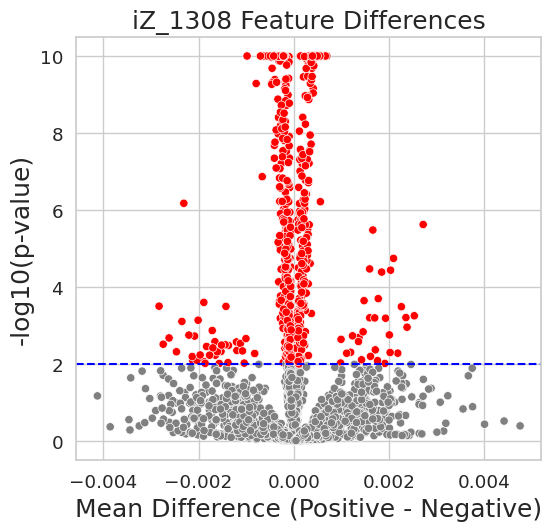

In [ ]:
# 3.1 set plot
plt.figure(figsize=(6, 5.5))
sns.scatterplot(
    data=result_df,
    x='mean_diff',
    y='neg_log10_p',
    hue=result_df['neg_log10_p'] > 2,
    palette={True: 'red', False: 'grey'},
    legend=False
)

plt.title(f'{name} Feature Differences', fontsize=18)
plt.xlabel('Mean Difference (Positive - Negative)', fontsize=18)
plt.ylabel('-log10(p-value)', fontsize=18)
plt.axhline(2, color='blue', linestyle='--')  # p=0.01 as reference
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Deepknock/Interpretability/{name}_10p_1-1_vocanol_plot', dpi=600)
plt.show()

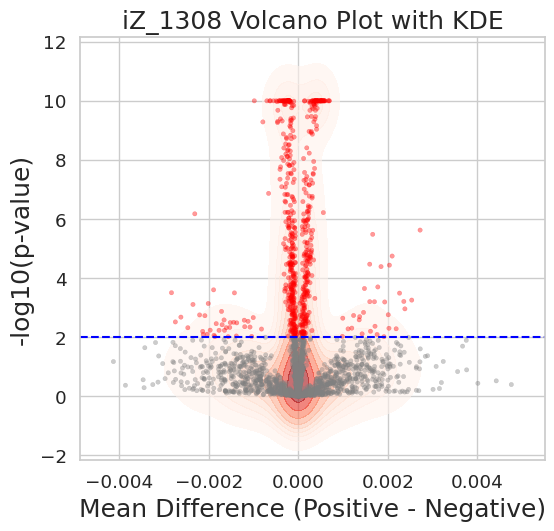

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5.5))

# KDE
sns.kdeplot(
    data=result_df,
    x='mean_diff',
    y='neg_log10_p',
    levels=10,
    cmap="Reds",
    fill=True,
    alpha=0.6
)

# scatter plot
sns.scatterplot(
    data=result_df,
    x='mean_diff',
    y='neg_log10_p',
    hue=result_df['neg_log10_p'] > 2,
    palette={True: 'red', False: 'grey'},
    edgecolor=None,
    alpha=0.4,
    s=10,
    legend=False
)

plt.axhline(2, color='blue', linestyle='--')
plt.xlabel('Mean Difference (Positive - Negative)',fontsize=18)
plt.ylabel('-log10(p-value)',fontsize=18)
plt.title(f'{name} Volcano Plot with KDE',fontsize=18)
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Deepknock/Interpretability/{name}_10p_1-1_contour_volcano_plot.png', dpi=600)
plt.show()


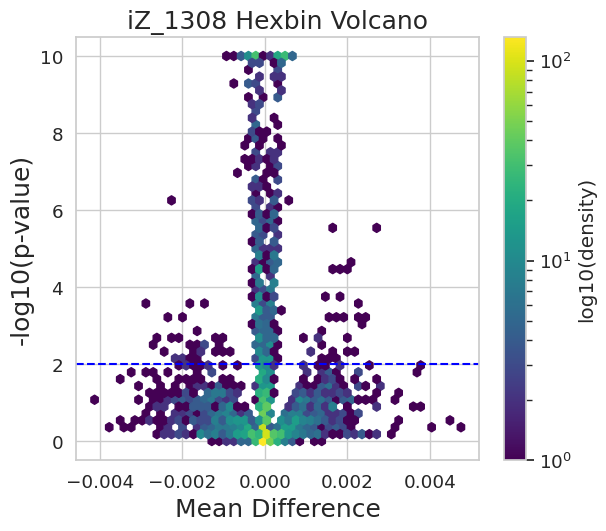

In [ ]:
plt.figure(figsize=(6.5, 5.5))
plt.hexbin(
    result_df['mean_diff'],
    result_df['neg_log10_p'],
    gridsize=50,
    cmap='viridis',
    bins='log'
)
plt.colorbar(label='log10(density)')
plt.axhline(2, color='blue', linestyle='--')
plt.xlabel('Mean Difference',fontsize=18)
plt.ylabel('-log10(p-value)',fontsize=18)
plt.title(f'{name} Hexbin Volcano',fontsize=18)
plt.grid(True)
plt.savefig(f'/content/drive/MyDrive/Deepknock/Interpretability/{name}_10p_1-1_hexbin_volcano.png', dpi=600)
plt.show()


Top features: ['2', '802', '884', '402', '318', '283', '683', '718', '544', '929', '506', '98', '944', '102', '343', '118', '902', '898', '144', '77', '1083', '498', '365', '583', '1118', '484', '260', '874', '529', '876', '738', '356', '304', '460', '764', '403', '518', '1164', '843', '1165', '909', '906', '918', '765', '364', '473', '743', '873', '106', '680', '983', '595', '767', '84', '129', '589', '1154', '803', '930', '396', '543', '338', '1138', '697', '40', '60', '109', '3', '495', '476', '1060', '269', '509', '818', '97', '773', '860', '754', '418', '143', '895', '502', '95', '530', '18', '1097', '919', '897', '74', '354', '183', '1086', '174', '218', '119', '279', '195', '367', '574', '399', '373', '406', '474', '519', '443', '280', '943', '552', '789', '1018', '1069', '376', '237', '1199', '840', '76', '309', '477', '974', '734', '1143', '286', '978', '1167', '184', '1080', '375', '204', '880', '187', '669', '989', '417', '391', '14', '679', '1173', '414', '238', '806', '554

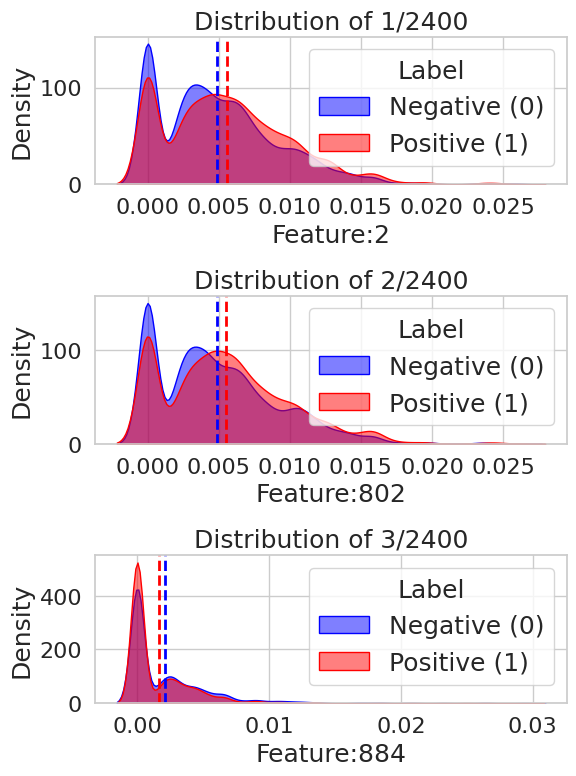

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# select top features that change largely
top_features = result_df.sort_values(by='neg_log10_p', ascending=False).head(2400)['feature'].tolist()
print('Top features:', top_features)

# plot
features_to_plot = [top_features[0], top_features[1], top_features[2]]
features_order = [1, 2, 3]

# font_size
title_fontsize = 18
label_fontsize = 18
legend_fontsize = 18
tick_fontsize = 16

# 5 rows and 1 column
fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=False)

# set color
colors = {0: 'blue', 1: 'red'}

# plot
for idx, (feature, order) in enumerate(zip(features_to_plot, features_order)):
    ax = axes[idx]

    # label 0 and label 1
    data_label0 = df[df['label'] == 0][feature]
    data_label1 = df[df['label'] == 1][feature]

    # kdeplot
    sns.kdeplot(data=data_label0, fill=True, color=colors[0], alpha=0.5, label='Negative (0)', ax=ax)
    sns.kdeplot(data=data_label1, fill=True, color=colors[1], alpha=0.5, label='Positive (1)', ax=ax)

    # vertical line
    mean0 = data_label0.mean()
    mean1 = data_label1.mean()
    ax.axvline(mean0, color=colors[0], linestyle='--', linewidth=2)
    ax.axvline(mean1, color=colors[1], linestyle='--', linewidth=2)

    # title and axis
    ax.set_title(f'Distribution of {order}/2400', fontsize=title_fontsize)
    ax.set_xlabel(f'Feature:{feature}', fontsize=label_fontsize)
    ax.set_ylabel('Density', fontsize=label_fontsize)

    # fontsize
    ax.tick_params(axis='both', labelsize=tick_fontsize)

    # legend
    ax.legend(fontsize=legend_fontsize, title='Label', title_fontsize=legend_fontsize)

# layout
plt.tight_layout()

# save pic
plt.savefig(f'/content/drive/MyDrive/Deepknock/Interpretability/{name}_10p_1-2_3_features_order.png', dpi=600, bbox_inches='tight')

plt.show()


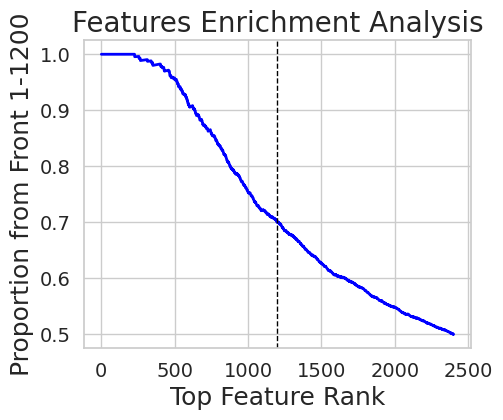

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 1. to int
top_features = [int(f) for f in top_features]

# 2. set numbers of features
total_features = 2400
mid_point = 1200  # 1-1200 and 1201-2400

# 3. ratio_list
front_ratios = []

# 4. calculate the ratio of features in top 1,200
for i in range(1, total_features + 1):
    current_slice = top_features[:i]
    front_count = sum(1 for x in current_slice if x <= mid_point)
    ratio = front_count / i
    front_ratios.append(ratio)

# 5. plot
plt.figure(figsize=(5, 4))
plt.plot(range(1, total_features + 1), front_ratios, color='blue', linewidth=2)

# middle line
plt.axvline(x=1200, color='black', linestyle='--', linewidth=1)

#
plt.title('Features Enrichment Analysis', fontsize=20)
plt.xlabel('Top Feature Rank', fontsize=18)
plt.ylabel('Proportion from Front 1-1200', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)

#
plt.savefig(f'/content/drive/MyDrive/Deepknock/Interpretability/{name}_10p_1-3_features_enrichment.png', dpi=600, bbox_inches='tight')

#
plt.show()


In [ ]:
top

#### 2 Input Gradient / Saliency Map

In [ ]:
import pandas as pd
import torch
from torch import nn

# load data
data_path = f'/content/drive/MyDrive/Deepknock/Interpretability/original_features_{name}.csv'
df = pd.read_csv(data_path)

feature_cols = [col for col in df.columns if col != 'label']
X = df[feature_cols].values  # shape (20000, 2400)
y = df['label'].values

# to Tensor
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

print('X shape:', X_tensor.shape)  # (20000, 2400)
print('y shape:', y_tensor.shape)

X shape: torch.Size([20000, 2400])
y shape: torch.Size([20000])


In [ ]:
# grad
X_tensor.requires_grad = True

# Forward pass
logits = mlp(X_tensor)

# logits.squeeze()
logit_for_backprop = logits.squeeze()  # shape (batch_size,)
logit_for_backprop.sum().backward()

# input grad
saliency = X_tensor.grad  # (20000, 2400)

# absolute value
saliency_abs = saliency.abs()

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [ ]:
saliency_abs.max()

tensor(0.3755)

In [ ]:
saliency_abs

tensor([[0.0810, 0.0723, 0.2255,  ..., 0.0045, 0.0015, 0.0034],
        [0.0681, 0.0601, 0.1809,  ..., 0.0038, 0.0013, 0.0027],
        [0.0794, 0.0709, 0.2210,  ..., 0.0044, 0.0015, 0.0033],
        ...,
        [0.0764, 0.0674, 0.2029,  ..., 0.0042, 0.0014, 0.0030],
        [0.0798, 0.0713, 0.2222,  ..., 0.0044, 0.0015, 0.0034],
        [0.0850, 0.0760, 0.2368,  ..., 0.0047, 0.0016, 0.0036]])

In [ ]:
saliency_abs = (saliency_abs - saliency_abs.min()) / (saliency_abs.max() - saliency_abs.min())

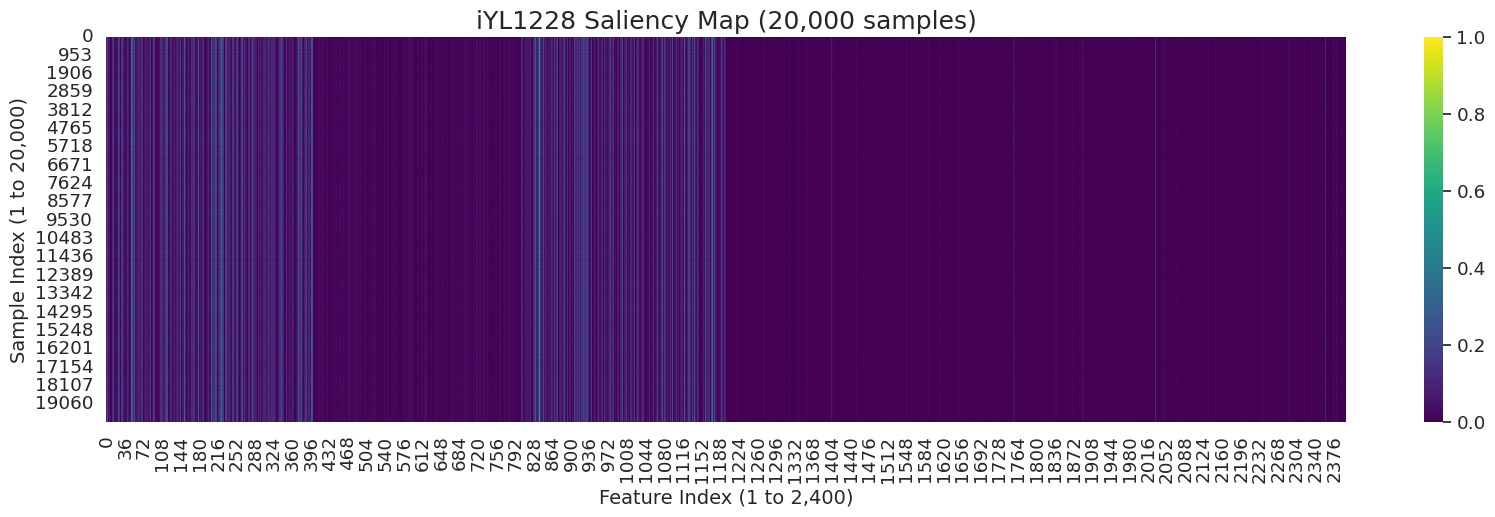

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
sns.heatmap(
    saliency_abs[:20000].detach().numpy(),
    cmap='viridis',
    cbar=True,
    vmin=0,
    vmax=1  # normalize
)
plt.title(f'{name} Saliency Map (20,000 samples)', fontsize=18)
plt.xlabel('Feature Index (1 to 2,400)', fontsize=14)
plt.ylabel('Sample Index (1 to 20,000)', fontsize=14)
plt.savefig(f'/content/drive/MyDrive/Deepknock/Interpretability/{name}_10p_2_feature_importance.png', dpi=600, bbox_inches='tight')
plt.show()

#### 3 t-SNE Scatter Plot

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

# 1. load data
file_path = f'/content/drive/MyDrive/Deepknock/Interpretability/original_features_{name}.csv'
df = pd.read_csv(file_path)

# 2. split features and labels
feature_cols = [col for col in df.columns if col != 'label']
X = df[feature_cols].values
y = df['label'].values

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Deepknock/Interpretability/original_features_iZ_1308.csv'

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE embedding shape: (2000, 2)


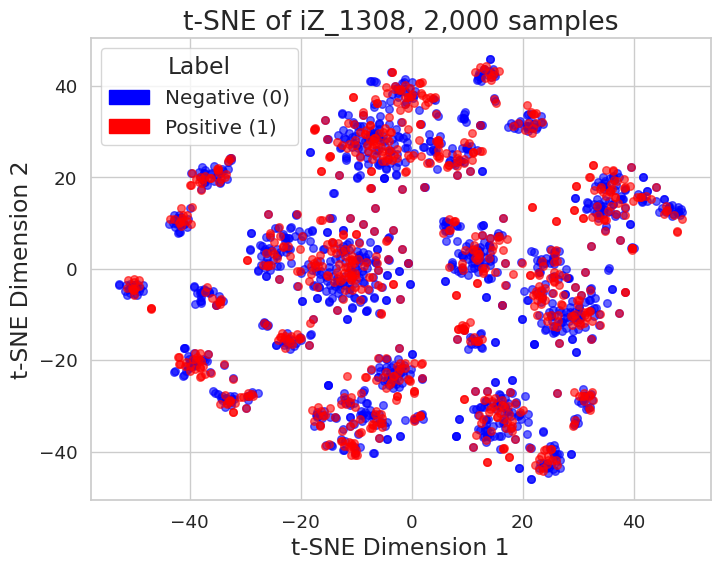

In [ ]:
# 3. sample number
n_samples = 2000  # change here
X_subset = X[:n_samples]
y_subset = y[:n_samples]

# 4. standardscaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# 5. t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=9, n_iter=600)
X_embedded = tsne.fit_transform(X_scaled)

print('t-SNE embedding shape:', X_embedded.shape)

# 6. to DataFrame
tsne_df = pd.DataFrame({
    'tsne_1': X_embedded[:, 0],
    'tsne_2': X_embedded[:, 1],
    'label': y_subset
})

# 7. plot
def plot_tsne(tsne_df, title='t-SNE Visualization (Selected Features)', font_scale=1.2):
    sns.set(style="whitegrid", font_scale=font_scale)
    plt.figure(figsize=(8, 6))

    # scatter
    palette = {0: 'blue', 1: 'red'}
    for label, color in palette.items():
        subset = tsne_df[tsne_df['label'] == label]
        plt.scatter(subset['tsne_1'], subset['tsne_2'],
                    label=f'{"Negative (0)" if label == 0 else "Positive (1)"}',
                    color=color, alpha=0.6, s=30)

    plt.title(title, fontsize=16 * font_scale)
    plt.xlabel('t-SNE Dimension 1', fontsize=14 * font_scale)
    plt.ylabel('t-SNE Dimension 2', fontsize=14 * font_scale)

    # legend
    handles = [
        mpatches.Patch(color='blue', label='Negative (0)'),
        mpatches.Patch(color='red', label='Positive (1)')
    ]
    plt.legend(handles=handles, fontsize=12 * font_scale, title='Label', title_fontsize=14 * font_scale)

    plt.grid(True)
    #plt.savefig(f'/content/drive/MyDrive/Deepknock/Interpretability/{name}_10p_3_tsne.png', dpi=600, bbox_inches='tight')
    plt.show()

# 8. plot
plot_tsne(tsne_df, title=f't-SNE of {name}, 2,000 samples', font_scale=1.2)